In [16]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [17]:
df = pd.read_csv('Validation error of 305 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,8.655582,-18.517764,-13.518179,-1.364768,-12.377820,-5.077257,0.709029,3.036800e+27,1222.222224,...,-9.466183,-14.838882,-14.838882,3.299653e+27,995.893996,-9.735330,9.807200e+07,-8.294476,-14.085474,-14.944094
1,0,31.932318,-22.568487,-2.157591,-1.407282,-4.605844,-1.931683,-13.902725,2.530667e+27,1666.666687,...,-9.466183,-18.420681,-16.629781,3.338767e+27,1290.525228,-12.766460,6.586373e+07,-9.030186,-18.064852,-14.317788
2,0,-9.168926,-9.197164,90.836900,-6.106503,21.266190,10.256030,48.947254,2.783733e+27,1111.111112,...,-11.257083,-9.466183,-9.466183,2.528495e+27,1008.920405,-4.394182,7.804091e+07,-13.651035,-10.437038,-14.099620
3,0,-19.312537,-16.594925,20.677010,-1.443919,52.463487,29.028222,26.387935,2.530667e+27,1222.222224,...,-9.466183,-5.884384,-7.675284,2.041931e+27,1019.395361,-7.101098,8.727529e+07,-14.432473,-7.592516,-9.700633
4,0,-30.073236,-27.055582,0.464906,-1.067853,-8.222791,-2.884581,-39.369558,2.783733e+27,2000.000000,...,-11.257083,-9.466183,-14.838882,1.946575e+27,1458.888352,-13.108643,7.146994e+07,-10.331436,-9.193124,-8.996880


In [18]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,304.0,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,3.040000e+02,304.000000,...,304.000000,304.000000,304.000000,3.040000e+02,304.000000,304.000000,3.040000e+02,304.000000,304.000000,304.000000
mean,0.0,-3.796771,-5.813001,1.803941,-0.918692,2.984972,2.487796,5.092512,2.622237e+27,1510.599422,...,-10.102424,-10.862378,-10.644407,2.371139e+27,1362.992483,-10.190814,7.798062e+07,-10.174414,-10.888892,-9.823542
std,0.0,31.356702,25.089957,20.099000,3.206269,23.111301,18.538173,78.723525,7.312920e+26,334.080180,...,4.961584,4.873982,4.889364,5.570912e+26,253.541540,4.649309,1.558092e+07,4.929766,4.740280,5.168303
min,0.0,-53.573541,-50.019032,-36.461545,-9.796351,-81.613016,-39.024425,-287.125814,1.518400e+27,1000.000000,...,-18.420681,-18.420681,-18.420681,1.508691e+27,986.785945,-18.432142,5.575337e+07,-18.466752,-18.441702,-18.590554
25%,0.0,-25.928764,-24.977369,-9.033014,-2.678074,-9.325460,-6.206423,-40.060854,2.024533e+27,1222.222224,...,-14.838882,-14.838882,-14.838882,1.945159e+27,1162.593417,-13.949340,6.382749e+07,-14.220984,-15.225450,-14.054162
50%,0.0,-9.945316,-9.371156,-0.555799,-0.591726,1.526598,-0.105852,-6.977323,2.530667e+27,1444.444448,...,-9.466183,-11.257083,-11.257083,2.289200e+27,1334.362626,-10.715089,7.668909e+07,-10.203500,-10.605769,-9.687496
75%,0.0,9.547128,9.211652,6.567563,0.844372,10.735972,7.590971,28.368260,3.289867e+27,1777.777791,...,-5.884384,-7.675284,-5.884384,2.766098e+27,1547.471374,-5.998668,9.152229e+07,-6.383770,-7.149546,-5.757488
max,0.0,123.700780,80.624688,104.250342,9.525287,87.827277,149.460196,446.553382,3.796000e+27,2000.000000,...,-2.302585,-2.302585,-2.302585,3.750722e+27,2030.459881,-1.960715,1.068337e+08,-0.423376,-1.404014,4.308731


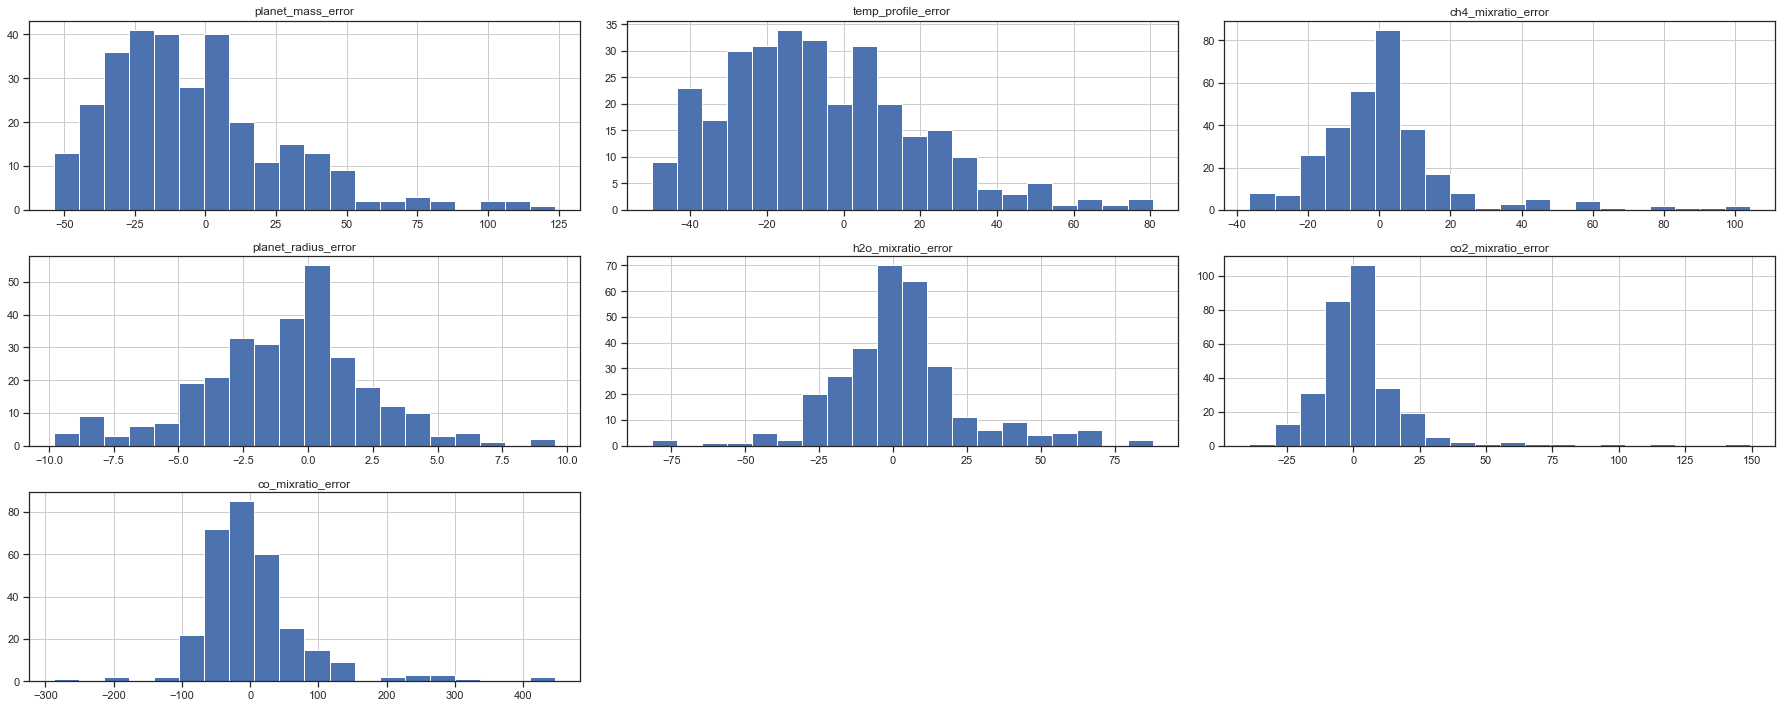

In [19]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

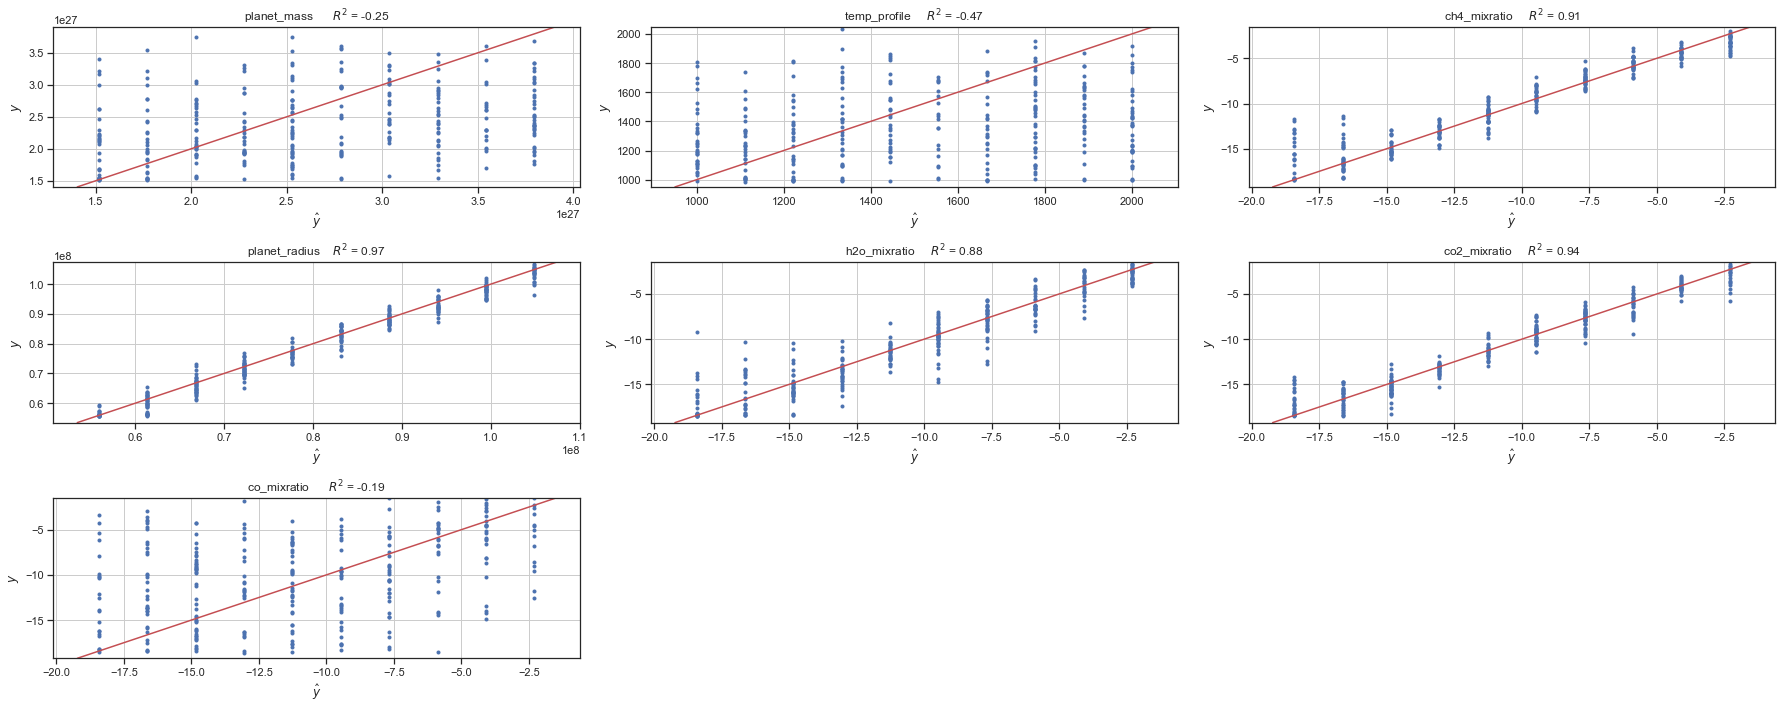

In [32]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    y_hat = df[param+'_real']
    y = df[param+'_inpainted']
    
    r2 = r2_score(y_hat, y)
    
    plt.subplot(3,3,i+1)

    plt.title(param +' \t $R^2$ = %.2f' % r2)
    plt.plot(y_hat, y, '.')
    #plt.ylim(plt.xlim()) # set y axis range the same as x axis range
    plt.plot(plt.xlim(), plt.ylim(), ls="-", c='r')
    
    plt.xlabel(r"$\hat{y}$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.tight_layout()